# 2024 Winter Introduction to Deep Learning
### Based on Prof. Oh's Youtube Lecture
https://youtube.com/playlist?list=PLvbUC2Zh5oJvByu9KL82bswYT2IKf0K1M

> Assignment #6


*   Youtube Lecture #23-26
*   Written by Seungeun Lee

## 2. Multi-class Classification w/ pre-trained ResNet model
*     Dataset: CIFAR10



*    Reference. https://github.com/Justin-A/DeepLearning101/blob/master/4-5_Load-Pre-trained_Model.ipynb

### Quick Question. This chapter covers concepts and applications of Transfer Learning. Then what's the transfer learning? Google it and write your own answer.

# **전이학습(Transfer leaning)이란**

어떤 목적을 이루기 위해 학습된 모델을 다른 작업에 이용하는 것

학습이 빠르게 수행될 수 있음 이미 입력되는 데이터에 대해 특징을 효율적으로 추출하기 때문에, 학습할 데이터에 대해 특징을 추출하기 위한 학습을 별도로 하지 않아도 되기 때문

작은 데이터셋에 대해 학습할 때 오버피팅을 예방할 수 있음 적은 데이터로 특징을 추출하기 위한 학습을 하게 되면, 데이터 수에 비해 모델의 가중치 수가 많을 수 있어 미세한 특징까지 모두 학습할 수 있음
전이 학습을 이용해 마지막 레이어만 학습하게 한다면, 학습할 가중치 수가 줄어 과한 학습이 이루어지지 않게 할 수 있음


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [2]:
# 런타임 - 런타임 유형 변경 - T4 GPU
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 2.3.1+cu121  Device: cuda


In [3]:
BATCH_SIZE = 32
EPOCHS = 10

In [4]:
train_dataset = datasets.CIFAR10(root = "../data/CIFAR_10",
                                  train = True,
                                  download = True,
                                  transform = transforms.Compose([
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

test_dataset = datasets.CIFAR10(root = "../data/CIFAR_10",
                                train = False,
                                transform = transforms.Compose([
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                            batch_size = BATCH_SIZE,
                                            shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)


100%|██████████| 170498071/170498071 [00:04<00:00, 40847245.97it/s]


Extracting ../data/CIFAR_10/cifar-10-python.tar.gz to ../data/CIFAR_10


In [5]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


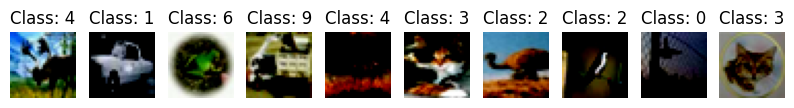

In [6]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title('Class: ' + str(y_train[i].item()))

In [7]:
import torchvision.models as models
model = models.resnet34(pretrained = True) # Load ResNet34 model w/ pre-trained weight
print(model) # print the model architecture -- default ResNet34 model (pre-trained w/ Imagenet Dataset) has final 1000 output nodes
# BUT we have 10 classes in CIFAR"10" dataset!! What is CIFAR10?? Check https://tutorials.pytorch.kr/beginner/blitz/cifar10_tutorial.html?highlight=cifar for details

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 157MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [8]:
## IMPORTANT: There are 2 ways to use pre-trained models

# (1) NOT updating the weights of the pre-trained models, and use the model as it is
for parameter in model.parameters():
    parameter.requires_grad = False # We previously learned the requires_grad means utilizing backpropagation

# (2) Updating the weights of the pre-trained mdoels
# for parameter in model.parameters():
#     parameter.requires_grad = True

# We usually use method #1 when using pre-trained models, but it's not the 100% perfect answer -- sometimes method #2 works better
# The optimal solution may vary according to the dataset or other techniques such as learning rate, optimizer, and so on

num_ftrs = model.fc.in_features # To mitigate such CIFAR"10" issue, we should add one more layer having final 10 output nodes
model.fc = nn.Linear(num_ftrs, 10) # Add such layer!

model = model.cuda()

In [9]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [10]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image),
                len(train_loader.dataset), 100. * batch_idx / len(train_loader),
                loss.item()))

In [11]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()

    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [12]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000 (0%)]	Train Loss: 2.903071
Train Epoch: 1 [6400/50000 (13%)]	Train Loss: 1.881145
Train Epoch: 1 [12800/50000 (26%)]	Train Loss: 1.348819
Train Epoch: 1 [19200/50000 (38%)]	Train Loss: 1.606528
Train Epoch: 1 [25600/50000 (51%)]	Train Loss: 1.879963
Train Epoch: 1 [32000/50000 (64%)]	Train Loss: 1.709180
Train Epoch: 1 [38400/50000 (77%)]	Train Loss: 1.491121
Train Epoch: 1 [44800/50000 (90%)]	Train Loss: 1.531791

[EPOCH: 1], 	Test Loss: 1.6500, 	Test Accuracy: 44.99 % 

Train Epoch: 2 [0/50000 (0%)]	Train Loss: 1.351782
Train Epoch: 2 [6400/50000 (13%)]	Train Loss: 1.348819
Train Epoch: 2 [12800/50000 (26%)]	Train Loss: 1.469926
Train Epoch: 2 [19200/50000 (38%)]	Train Loss: 1.494926
Train Epoch: 2 [25600/50000 (51%)]	Train Loss: 1.169928
Train Epoch: 2 [32000/50000 (64%)]	Train Loss: 1.490398
Train Epoch: 2 [38400/50000 (77%)]	Train Loss: 1.430353
Train Epoch: 2 [44800/50000 (90%)]	Train Loss: 1.514878

[EPOCH: 2], 	Test Loss: 1.5877, 	Test Accuracy: 46.66 % 

### Question 1. Compare & Contrast the test result (accuracy) of requires_grad = False & True.


In [13]:
import torchvision.models as models

model = models.resnet34(pretrained = True)

for parameter in model.parameters():
    parameter.requires_grad = True

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model = model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000 (0%)]	Train Loss: 2.597230
Train Epoch: 1 [6400/50000 (13%)]	Train Loss: 1.703773
Train Epoch: 1 [12800/50000 (26%)]	Train Loss: 1.533722
Train Epoch: 1 [19200/50000 (38%)]	Train Loss: 1.229460
Train Epoch: 1 [25600/50000 (51%)]	Train Loss: 1.101461
Train Epoch: 1 [32000/50000 (64%)]	Train Loss: 0.884413
Train Epoch: 1 [38400/50000 (77%)]	Train Loss: 1.274760
Train Epoch: 1 [44800/50000 (90%)]	Train Loss: 1.077582

[EPOCH: 1], 	Test Loss: 0.8459, 	Test Accuracy: 70.68 % 

Train Epoch: 2 [0/50000 (0%)]	Train Loss: 1.023623
Train Epoch: 2 [6400/50000 (13%)]	Train Loss: 0.977881
Train Epoch: 2 [12800/50000 (26%)]	Train Loss: 0.774284
Train Epoch: 2 [19200/50000 (38%)]	Train Loss: 0.440472
Train Epoch: 2 [25600/50000 (51%)]	Train Loss: 0.874730
Train Epoch: 2 [32000/50000 (64%)]	Train Loss: 0.634934
Train Epoch: 2 [38400/50000 (77%)]	Train Loss: 0.477744
Train Epoch: 2 [44800/50000 (90%)]	Train Loss: 0.627015

[EPOCH: 2], 	Test Loss: 0.7237, 	Test Accuracy: 75.44 % 

정확도 올라감

### Question 2. Change the model ResNet34 to ResNet50 and run the entire code. Compare & Contrast the results of those two models.


In [14]:
model = models.resnet50(pretrained = True)

for parameter in model.parameters():
    parameter.requires_grad = False
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)

model = model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 182MB/s]


Train Epoch: 1 [0/50000 (0%)]	Train Loss: 2.361080
Train Epoch: 1 [6400/50000 (13%)]	Train Loss: 2.096017
Train Epoch: 1 [12800/50000 (26%)]	Train Loss: 1.717138
Train Epoch: 1 [19200/50000 (38%)]	Train Loss: 1.507598
Train Epoch: 1 [25600/50000 (51%)]	Train Loss: 1.302438
Train Epoch: 1 [32000/50000 (64%)]	Train Loss: 1.923771
Train Epoch: 1 [38400/50000 (77%)]	Train Loss: 1.402064
Train Epoch: 1 [44800/50000 (90%)]	Train Loss: 1.944538

[EPOCH: 1], 	Test Loss: 1.5885, 	Test Accuracy: 48.98 % 

Train Epoch: 2 [0/50000 (0%)]	Train Loss: 1.844952
Train Epoch: 2 [6400/50000 (13%)]	Train Loss: 1.744344
Train Epoch: 2 [12800/50000 (26%)]	Train Loss: 1.618778
Train Epoch: 2 [19200/50000 (38%)]	Train Loss: 1.290173
Train Epoch: 2 [25600/50000 (51%)]	Train Loss: 1.513290
Train Epoch: 2 [32000/50000 (64%)]	Train Loss: 1.857233
Train Epoch: 2 [38400/50000 (77%)]	Train Loss: 1.310100
Train Epoch: 2 [44800/50000 (90%)]	Train Loss: 1.368211

[EPOCH: 2], 	Test Loss: 1.5955, 	Test Accuracy: 49.65 % 

### Question 3. Change the model ResNet34 to Inceptionv3 or v4 and run the entire code. Compare & Contrast the results of those two models.

In [15]:
model = models.inception_v3(pretrained = True)

for parameter in model.parameters():
    parameter.requires_grad = False
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)

model = model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 186MB/s] 


RuntimeError: Calculated padded input size per channel: (1 x 1). Kernel size: (3 x 3). Kernel size can't be greater than actual input size

### The End.

##### Please upload your Colab file @Github https://github.com/duneag2/intro-dl/tree/main/Assignment6

*   First, make your folder by your name (e.g. seungeun)
*   Then upload your "Jupyter Notebook" file under that directory

###### Need Help?



*   Please refer to this link https://yeko90.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-colab%EC%BD%94%EB%9E%A9%EC%97%90%EC%84%9C-%EC%95%95%EC%B6%95%ED%8C%8C%EC%9D%BC-%ED%92%80%EA%B8%B0 OR
*   Just save your Jupyter Notebook (.ipynb) file in here (colab) and upload via 'Add file' - 'Upload files' https://nthree.tistory.com/60